# Glossary of house column labels
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbor

In [1]:
# importing libraries and packages necessary for the data exploration and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


In [2]:
# loading the dataframe into the notebook
df = pd.read_csv('kc_house_data.csv')


In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataframe contains data regarding house sales in the in King County, WA, between the years of 2014 and 2015. We'll proceed with some routine data cleaning in preparation for the exploratory data analysis.

In [5]:
# checking total missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [7]:
# turning nans to 0, assuming the missing values refer to an absence of waterfront, and creating a new column
waterfront_boolean = []
for i in range(0,len(df['waterfront'])):
    if df['waterfront'][i] == 0.0:
        waterfront_boolean.append(0.0)
    elif df['waterfront'].isna()[i] == True:
        waterfront_boolean.append(0.0)
    else:
        waterfront_boolean.append(1.0)
df['waterfront_bool'] = waterfront_boolean

In [8]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
# same process of waterfronts
view_boolean = []
for i in range(0,len(df['view'])):
    if df['view'].isna()[i] == True:
        view_boolean.append(0.0)
    else:
        view_boolean.append(df['view'][i])
df['view_cleaned'] = view_boolean

In [11]:
df['view_cleaned'].unique()

array([0., 3., 4., 2., 1.])

In [12]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
# same here, this time turning nans to 0 and the rest to 1, where:
# 0 = not renovated
# 1 = renovated
renovated_boolean = []
for i in range(0,len(df['yr_renovated'])):
    if df['yr_renovated'][i] == 0.0:
        renovated_boolean.append(0.0)
    elif df['yr_renovated'].isna()[i] == True:
        renovated_boolean.append(0.0)
    else:
        renovated_boolean.append(1.0)
df['renovated_bool'] = renovated_boolean

In [15]:
renovated_boolean

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [16]:
# splitting sale date in two separate year and month columns
year_sold = []
month_sold = []
for i in range(0,len(df['date'])):
    split_date = df['date'][i].split('/')
    
    year_sold.append(int(split_date[2]) - df['yr_built'][i])
    month_sold.append(int(split_date[0]))
    
df['age_when_sold'] = year_sold
df['month_of_sale'] = month_sold

In [17]:
df['month_of_sale'].unique()   

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [18]:
df['age_when_sold'].unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1])

In [19]:
# assuming -1 means the house has been sold before building completion finished, turning it to 0
age_cleaned = []
for i in range(0,len(df['age_when_sold'])):
    if df['age_when_sold'][i] == -1:
        age_cleaned.append(0.0)
    else:
        age_cleaned.append(df['age_when_sold'][i])
df['age_when_sold'] = age_cleaned

In [20]:
df['age_when_sold'].unique()

array([ 59.,  63.,  82.,  49.,  28.,  13.,  19.,  52.,  55.,  12.,  50.,
        72.,  87.,  37., 115.,  36.,  20.,  98.,  93.,  46.,  67.,  29.,
        73.,  99., 105.,  66.,  10.,  11.,   9.,  85.,  33.,  84.,  81.,
       110.,  18.,  14.,  30.,   0.,  92.,  62.,  64.,  34.,  88.,   6.,
        24.,  60.,  41.,  35.,  89.,  25.,  43.,  58.,  74.,  22.,  51.,
        53.,   8.,  26.,  75.,  68.,  48.,  39., 104.,  31., 114.,   4.,
        69.,  65.,  90.,  27., 101.,  47.,  54., 109.,   7.,  61.,  15.,
        38.,  16., 113.,  21.,  94.,  45., 100., 111.,  96.,  97.,  86.,
       103.,  78.,  77.,  76., 107.,  40.,  57., 102.,  17.,  71.,   1.,
        23.,  91.,  42.,  95.,   2.,  32.,   3.,  56.,  70.,  44., 112.,
         5.,  80.,  83., 106., 108.,  79.])

In [21]:
# checking for outliers
for col in df.columns:
    print(df[col].value_counts(), '\n\n')

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64 


6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/2/2014       1
5/27/2015       1
1/31/2015       1
11/30/2014      1
5/15/2015       1
Name: date, Length: 372, dtype: int64 


350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64 


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64 


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50 

In [22]:
df['sqft_basement'].loc[df['sqft_basement'] == '?']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

In [23]:
# changing ? to 0, again based on the assumption that ? stands for absence of basement
basement_filler = []
for i in range(0,len(df)):
    if df['sqft_basement'][i] == '?':
        basement_filler.append('0.0')
    else:
        basement_filler.append(df['sqft_basement'][i])
df['sqft_basement'] = basement_filler

df['sqft_basement'] = df['sqft_basement'].astype(float)

In [24]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [25]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,98103,47.6878,-122.331,1330,4700,0.0,0.0,0.0,67.0,6


In [26]:
df.loc[df['sqft_lot'] == 315374]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
145,1526069017,12/3/2014,921500.0,4,2.5,3670,315374,2.0,0.0,0.0,...,98077,47.7421,-122.026,2840,87991,0.0,0.0,0.0,20.0,12


In [27]:
df.loc[df['sqft_living'] > 12500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
12764,1225069038,5/5/2014,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,...,98053,47.6675,-121.986,4850,217800,0.0,4.0,0.0,15.0,5


In [28]:
# dropping outliers
df = df.drop(15856)
df = df.drop(145)
df = df.drop(12764)

In [29]:
df = df.drop_duplicates(subset = 'id')

In [30]:
# resetting index and creating a new clean dataframe
df.reset_index(inplace = True, drop=False)
df.drop(['index'], axis=1, inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,59.0,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,1.0,63.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,82.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,49.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,28.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,0.0,0.0,0.0,5.0,5
21413,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,0.0,0.0,0.0,1.0,2
21414,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,0.0,0.0,0.0,5.0,6
21415,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,98027,47.5345,-122.069,1410,1287,0.0,0.0,0.0,11.0,1


In [31]:
df.drop(['waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)

In [32]:
# the new dataframe
df_clean = df
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_bool,view_cleaned,renovated_bool,age_when_sold,month_of_sale
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,59.0,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,1.0,63.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,82.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,49.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,28.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8,...,98103,47.6993,-122.346,1530,1509,0.0,0.0,0.0,5.0,5
21413,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8,...,98146,47.5107,-122.362,1830,7200,0.0,0.0,0.0,1.0,2
21414,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7,...,98144,47.5944,-122.299,1020,2007,0.0,0.0,0.0,5.0,6
21415,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8,...,98027,47.5345,-122.069,1410,1287,0.0,0.0,0.0,11.0,1


In [33]:
df_clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'waterfront_bool', 'view_cleaned', 'renovated_bool',
       'age_when_sold', 'month_of_sale'],
      dtype='object')

# Summary of Data Cleaning

Modifications:

1. Missing values were filled in the listed columns:
 - waterfront
 - view
 - yr_renovated


2. Filler data were corrected in the listed columns:
 - sqft_basement


3. 180 rows were removed due to the following reasons:
 - Incorrect data: 3 rows
 - Duplicated data: 177 rows
 

4. 5 new columns were created:
 - waterfront_bool
 - view_cleaned
 - renovated_bool
 - age_when_sold
 - month_of_sale
 

5. 1 new dataframe was created:
 - house_data_cleaned
 

6. 3 columns were removed:
 - waterfront
 - view
 - yr_renovated
 
 


We can now start with the data analysis and provide some business insight. We settled on answering the following questions:



1. Is there a trend in house sale and month of sale?

2. Can we predict the house price by creating a correlation model using location (**zipcode**), size (**sqft_living**) and age (**yr_built**)?

3. 




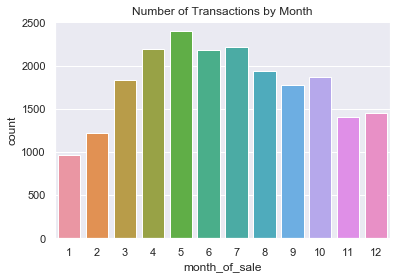

In [34]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_of_sale", data=df_clean).set_title('Number of Transactions by Month')

This visualization answers the first question straightforwardly: there is a trend in house sales over the course of the year, starting with a quick rise in the first five moths of the year, peaking in May and slowly declining as we approach the end of the year.

To answer the next question, we'll start by creating a heatmap that will help us better understand the correlation between variables.

In [35]:
df_corr = df_clean.drop(['id', 'zipcode', 'lat', 'long'], axis=1)

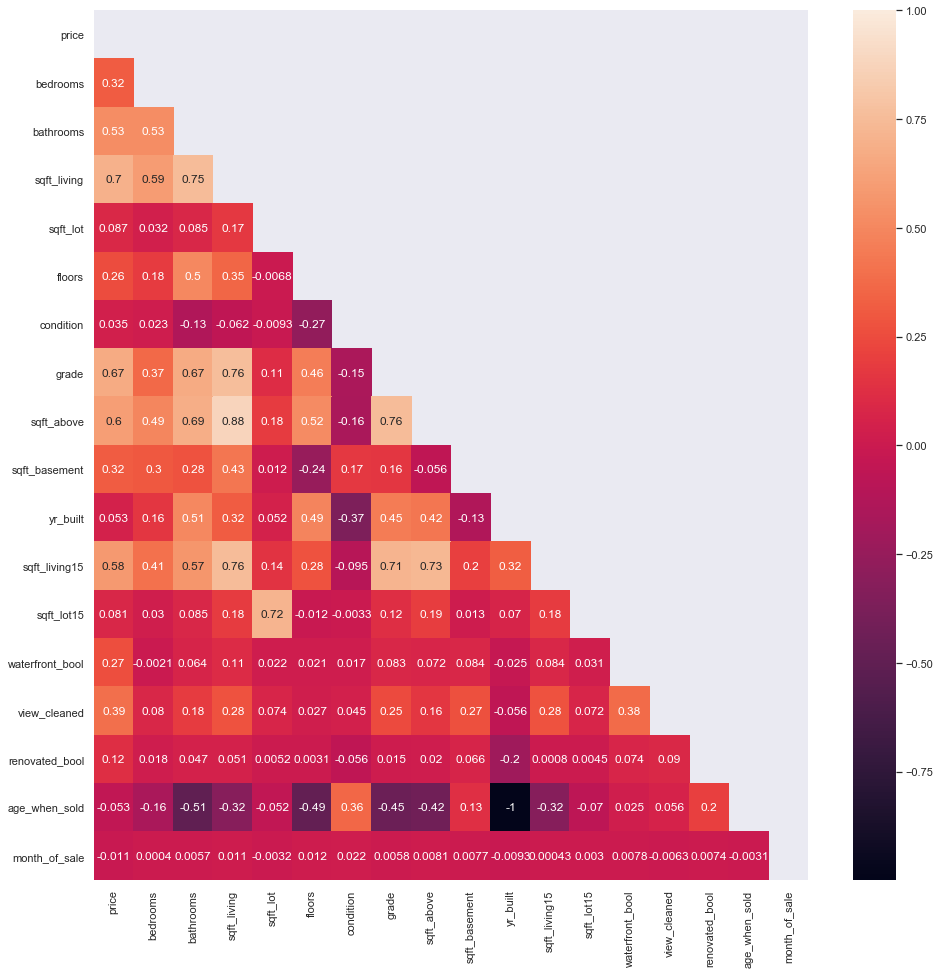

In [36]:
corr = df_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True, mask=mask)
plt.autoscale()
plt.show()

the heatmap above gives us a good overview of the correlation between variables, showing that the best indicators for house price are:
sqft_living (.70)
grade (.67)
sqft_living15 (0.58)
and number of bathrooms (0.53)

we can also detect where multicollinearity is stronger, in this case between bedrooms, bathrooms and grade. I'd assume that it is caused by a simple question of size (bigger houses are more likely to have multiple bedrooms and bathrooms) and quality (higher grade could mean more sophisticated houses with bigger and multiple bathrooms)


To answer our second question, we'll create a multivariate regression model that uses size, age and location to predinct the price of a house.

In [37]:
# creating a new dataframe containing the relevant information
test = ['price', 'sqft_living', 'zipcode', 'yr_built']
mvdf = df_clean[test]
mvdf

,price,sqft_living,zipcode,yr_built
0,221900.0,1180,98178,1955
1,538000.0,2570,98125,1951
2,180000.0,770,98028,1933
3,604000.0,1960,98136,1965
4,510000.0,1680,98074,1987
...,...,...,...,...
21412,360000.0,1530,98103,2009
21413,400000.0,2310,98146,2014
21414,402101.0,1020,98144,2009
21415,400000.0,1600,98027,2004


In [38]:
# assigning dummy variables to the zipcodes so the model treats it as categorical data instead of continuous
dummies = pd.get_dummies(mvdf.zipcode, drop_first=True, dtype=float)
dummies

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_dummies= pd.concat([mvdf,dummies],axis='columns')
df_dummies

,price,sqft_living,zipcode,yr_built,98002,98003,98004,98005,98006,98007,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,1180,98178,1955,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,2570,98125,1951,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,770,98028,1933,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,1960,98136,1965,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,1680,98074,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,360000.0,1530,98103,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21413,400000.0,2310,98146,2014,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21414,402101.0,1020,98144,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21415,400000.0,1600,98027,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# dropping the DV from the dataframe
X = df_dummies.drop(['zipcode', 'price'], axis=1)
X

,sqft_living,yr_built,98002,98003,98004,98005,98006,98007,98008,98010,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1180,1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2570,1951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,770,1933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1960,1965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1680,1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,1530,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21413,2310,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21414,1020,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21415,1600,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y = df_dummies.price

In [42]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     818.8
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:41   Log-Likelihood:            -2.9077e+05
No. Observations:               21417   AIC:                         5.817e+05
Df Residuals:                   21345   BIC:                         5.823e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.505e+05   1.07e+05      7.964      0.000    6.41e+05    1.06e+06
sqft_living   257.5851      1.633    157.784      0.000     254.385     260.785
yr_built     -535.3875     54.029     -9.909      0.000    -641.288    -429.487
98002        1.789e+04    1.7e+04      1.056      0.291   -1.53e+04    5.11e+04
98003        4635.6819   1.53e+04      0.303      0.762   -2.53e+04    3.46e+04
98004        8.105e+05   1.49e+04     54.541      0.000    7.81e+05     8.4e+05
98005          3.3e+05   1.79e+04     18.423      0.000    2.95e+05    3.65e+05
98006        3.226e+05   1.34e+04     24.124      0.000    2.96e+05    3.49e+05
98007        2.589e+05   1.91e+04     13.557      0.000    2.21e+05    2.96e+05
98008        2.984e+05   1.52e+04     19.611      0.000    2.69e+05    3.28e+05
98010        8.244e+04   2.17e+04      3.802      0.000    3.99e+04    1.25e+05
98011        1.201e+05    1.7e+04      7.052      0.000    8.67e+04    1.53e+05
98014        1.198e+05      2e+04      6.004      0.000    8.07e+04    1.59e+05
98019        8.128e+04   1.71e+04      4.741      0.000    4.77e+04    1.15e+05
98022        4.854e+04   1.61e+04      3.020      0.003     1.7e+04    8.01e+04
98023       -1.837e+04   1.33e+04     -1.385      0.166   -4.44e+04    7627.677
98024        1.818e+05   2.38e+04      7.654      0.000    1.35e+05    2.28e+05
98027        1.825e+05   1.38e+04     13.195      0.000    1.55e+05     2.1e+05
98028        1.232e+05   1.52e+04      8.102      0.000    9.34e+04    1.53e+05
98029        2.435e+05   1.47e+04     16.548      0.000    2.15e+05    2.72e+05
98030        1564.5370   1.57e+04      0.100      0.921   -2.92e+04    3.23e+04
98031        1.317e+04   1.54e+04      0.857      0.392    -1.7e+04    4.33e+04
98032        3433.4193      2e+04      0.172      0.863   -3.57e+04    4.26e+04
98033        3.999e+05   1.37e+04     29.243      0.000    3.73e+05    4.27e+05
98034        2.195e+05    1.3e+04     16.883      0.000    1.94e+05    2.45e+05
98038        3.113e+04   1.28e+04      2.427      0.015    5985.121    5.63e+04
98039        1.399e+06   2.93e+04     47.817      0.000    1.34e+06    1.46e+06
98040        5.996e+05   1.53e+04     39.065      0.000     5.7e+05     6.3e+05
98042        1.396e+04    1.3e+04      1.075      0.282   -1.15e+04    3.94e+04
98045        1.199e+05   1.64e+04      7.310      0.000    8.78e+04    1.52e+05
98052        2.487e+05   1.29e+04     19.294      0.000    2.23e+05    2.74e+05
98053        2.232e+05    1.4e+04     15.993      0.000    1.96e+05    2.51e+05
98055        4.747e+04   1.56e+04      3.050      0.002     1.7e+04     7.8e+04
98056        1.102e+05   1.39e+04      7.950      0.000     8.3e+04    1.37e+05
98058        3.356e+04   1.35e+04      2.483      0.013    7070.798    6.01e+04
98059        8.802e+04   1.34e+04      6.54

In [43]:
# strong positive correlation (.73). We'll remove the variables with p value greater than 0.05 to see if it changes
summary = results.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
X_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
X_cols.remove('const')

In [44]:
X = X[X_cols]
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     937.2
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:17:42   Log-Likelihood:            -2.9078e+05
No. Observations:               21417   AIC:                         5.817e+05
Df Residuals:                   21354   BIC:                         5.822e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.632e+05   1.06e+05      8.156      0.000    6.56e+05    1.07e+06
sqft_living   257.3939      1.631    157.780      0.000     254.196     260.591
yr_built     -540.6717     53.790    -10.052      0.000    -646.104    -435.239
98004        8.088e+05   1.14e+04     70.682      0.000    7.86e+05    8.31e+05
98005        3.282e+05   1.52e+04     21.591      0.000    2.98e+05    3.58e+05
98006        3.209e+05   9430.968     34.024      0.000    3.02e+05    3.39e+05
98007         2.57e+05   1.66e+04     15.499      0.000    2.24e+05    2.89e+05
98008        2.964e+05   1.19e+04     24.900      0.000    2.73e+05     3.2e+05
98010        8.058e+04   1.95e+04      4.131      0.000    4.23e+04    1.19e+05
98011        1.183e+05   1.42e+04      8.356      0.000    9.05e+04    1.46e+05
98014         1.18e+05   1.76e+04      6.715      0.000    8.35e+04    1.52e+05
98019         7.95e+04   1.43e+04      5.561      0.000    5.15e+04    1.08e+05
98022        4.659e+04    1.3e+04      3.586      0.000    2.11e+04    7.21e+04
98024        1.799e+05   2.18e+04      8.261      0.000    1.37e+05    2.23e+05
98027        1.808e+05   1.01e+04     17.933      0.000    1.61e+05    2.01e+05
98028        1.213e+05   1.19e+04     10.198      0.000     9.8e+04    1.45e+05
98029        2.418e+05   1.13e+04     21.461      0.000     2.2e+05    2.64e+05
98033        3.981e+05   9862.078     40.365      0.000    3.79e+05    4.17e+05
98034        2.176e+05   8906.634     24.428      0.000       2e+05    2.35e+05
98038        2.937e+04   8660.390      3.391      0.001    1.24e+04    4.63e+04
98039        1.398e+06   2.77e+04     50.489      0.000    1.34e+06    1.45e+06
98040        5.979e+05   1.21e+04     49.542      0.000    5.74e+05    6.22e+05
98045        1.181e+05   1.34e+04      8.815      0.000    9.18e+04    1.44e+05
98052        2.469e+05   8742.088     28.244      0.000     2.3e+05    2.64e+05
98053        2.215e+05   1.02e+04     21.615      0.000    2.01e+05    2.42e+05
98055         4.55e+04   1.24e+04      3.682      0.000    2.13e+04    6.97e+04
98056        1.083e+05   1.01e+04     10.700      0.000    8.85e+04    1.28e+05
98058        3.169e+04   9644.424      3.286      0.001    1.28e+04    5.06e+04
98059        8.627e+04   9546.557      9.036      0.000    6.76e+04    1.05e+05
98065        8.174e+04   1.15e+04      7.085      0.000    5.91e+04    1.04e+05
98070        2.023e+05   1.81e+04     11.189      0.000    1.67e+05    2.38e+05
98072        1.682e+05   1.21e+04     13.895      0.000    1.45e+05    1.92e+05
98074        2.172e+05   9860.033     22.029      0.000    1.98e+05    2.37e+05
98075        2.291e+05   1.08e+04     21.191      0.000    2.08e+05     2.5e+05
98077        1.571e+05   1.42e+04     11.079      0.000    1.29e+05    1.85e+05
98102        5.382e+05   1.91e+04     28.16

Text(47.32597001388892, 0.5, 'price ($)')

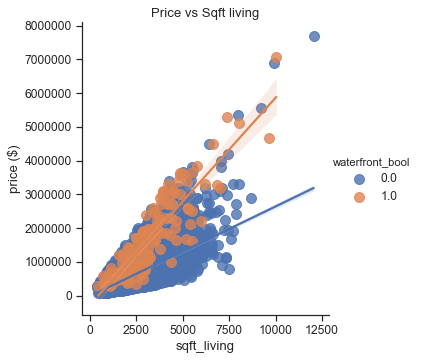

In [45]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('sqft_living', 
           'price', 
           data=df_clean,
           hue = "waterfront_bool",
           fit_reg=True,
           scatter_kws={"marker": "D",
                        "s": 100}) 


plt.title('Price vs Sqft living')
plt.xlabel('sqft_living')
plt.ylabel('price ($)')